In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timesynth as ts

In [2]:
np.random.seed(1)
np.set_printoptions(precision=2)

In [3]:
# Initializing TimeSampler
time_sampler = ts.TimeSampler(stop_time=20)
# Sampling irregular time samples   1440=360(# year' days )*4(#years)
irregular_time_samples = time_sampler.sample_irregular_time(num_points=1440)

In [4]:
# Initializing Pseudoperiodic signal
signal_AV = ts.signals.GaussianProcess(kernel='Matern', nu=1/4)
# Initializing Gaussian noise
white_noise_AV = ts.noise.GaussianNoise(std=0.25)

# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_signal_AV = ts.TimeSeries(signal_AV,white_noise_AV)
# Sampling using the irregular time samples
samples_AV, signals_AV, errors_AV = timeseries_signal_AV.sample(irregular_time_samples)


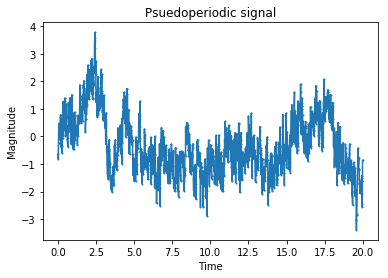

In [5]:
# Plotting the series
plt.plot(irregular_time_samples, samples_AV, marker='o',markersize=1)
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Psuedoperiodic signal');

In [6]:
# Initializing Pseudoperiodic signal
signal_rt = ts.signals.GaussianProcess(kernel='Matern', nu=1)

# Initializing Gaussian noise
white_noise_rt = ts.noise.GaussianNoise(std=0.2)
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_signal_rt = ts.TimeSeries(signal_rt,white_noise_rt)
# Sampling using the irregular time samples
samples_rt, signals_rt, errors_rt = timeseries_signal_rt.sample(irregular_time_samples)


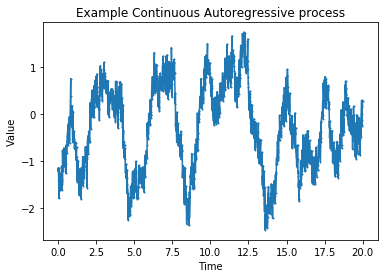

In [7]:
plt.plot(irregular_time_samples, samples_rt, marker='o', markersize=1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Example Continuous Autoregressive process');

In [8]:
# Initializing Pseudoperiodic signal
signal_th= ts.signals.GaussianProcess(kernel='Matern', nu=1.5)

# Initializing Gaussian noise
white_noise_th = ts.noise.GaussianNoise(std=0.1)
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_signal_th = ts.TimeSeries(signal_th,white_noise_th)
# Sampling using the irregular time samples
samples_th, signals_th, errors_th = timeseries_signal_th.sample(irregular_time_samples)


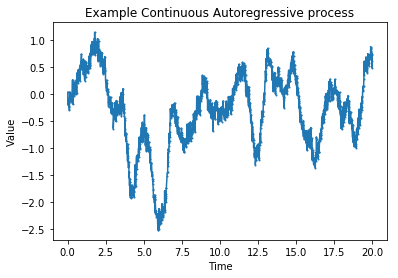

In [9]:
plt.plot(irregular_time_samples, samples_th, marker='o', markersize=1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Example Continuous Autoregressive process');

In [10]:
# Initializing Pseudoperiodic signal
signal_cost = ts.signals.GaussianProcess(kernel='Matern', nu=1./2)

# Initializing Gaussian noise
white_noise_cost = ts.noise.GaussianNoise(std=0.3)
# Initializing TimeSeries class with the pseudoperiodic signal
timeseries_signal_cost = ts.TimeSeries(signal_cost,white_noise_cost)
# Sampling using the irregular time samples
samples_cost, signals_cost, errors_cost = timeseries_signal_cost.sample(irregular_time_samples)


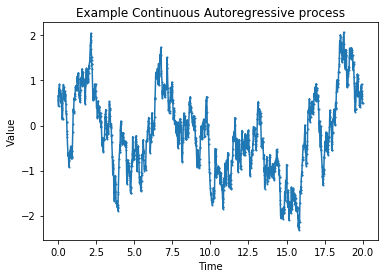

In [11]:
plt.plot(irregular_time_samples, signals_cost, marker='o', markersize=1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Example Continuous Autoregressive process');

In [12]:
import pandas as pd
import datetime
behavior_comlumns=['Av','Rt','Th','Cost']
todays_date = datetime.datetime.now().date()
index = pd.date_range(todays_date-datetime.timedelta(1440), periods=1440, freq='D')
behavior_df=pd.DataFrame(index=index,columns=behavior_comlumns)
behavior_df.head()

,Av,Rt,Th,Cost
2015-03-08,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN
2015-03-11,NaN,NaN,NaN,NaN
2015-03-12,NaN,NaN,NaN,NaN


In [13]:
behavior_df['Av']=samples_AV
behavior_df['Rt']=samples_rt
behavior_df['Th']=samples_th
behavior_df['Cost']=samples_cost

In [14]:
behavior_df.head()

,Av,Rt,Th,Cost
2015-03-08,-0.653217,-1.208138,0.035898,0.686675
2015-03-09,-0.802947,-1.141428,-0.191226,1.119029
2015-03-10,-0.231388,-1.231403,-0.172712,0.063641
2015-03-11,0.188716,-1.633530,-0.093020,1.280439
2015-03-12,0.475494,-1.790954,-0.096436,0.742509


In [15]:
behavior_df.to_csv('behavior.csv')

In [16]:
from sklearn import preprocessing
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()


AV = behavior_df[['Av']].values.astype(float)
AV_scaled = min_max_scaler.fit_transform(AV)


RT = behavior_df[['Rt']].values.astype(float)
RT_scaled = min_max_scaler.fit_transform(RT)


TH = behavior_df[['Th']].values.astype(float)
TH_scaled = min_max_scaler.fit_transform(TH)


COST = behavior_df[['Cost']].values.astype(float)
COST_scaled = min_max_scaler.fit_transform(COST)




In [17]:
behavior_df[['Av']]=AV_scaled
behavior_df[['Rt']]=RT_scaled
behavior_df[['Th']]=TH_scaled
behavior_df[['Cost']]=COST_scaled

In [18]:
behavior_df.to_csv('behavior.csv')

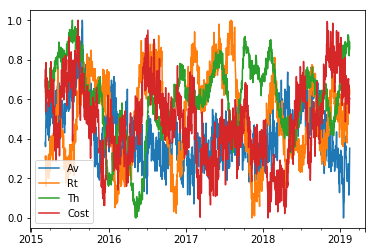

In [19]:
behavior_df.plot()